In [1]:
%run data_preprocessing.ipynb

<Figure size 640x480 with 1 Axes>

Benin
Statistics=8.803, p=0.012
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Burkina Faso
Statistics=33.110, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Ivory Coast
Statistics=88.425, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Ghana
Statistics=117.618, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Mali
Statistics=1.080, p=0.583
Sample looks Gaussian (fail to reject H0)


<Figure size 640x480 with 1 Axes>

Mauritania
Statistics=130.257, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Nigeria
Statistics=45.750, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Senegal
Statistics=5.775, p=0.056
Sample looks Gaussian (fail to reject H0)


<Figure size 640x480 with 1 Axes>

Chad
Statistics=67.856, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Togo
Statistics=102.898, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Cameroun
Statistics=9.514, p=0.009
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Guinea
Statistics=45.050, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Sudan
Statistics=13.657, p=0.001
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Niger
Statistics=103.552, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Centrafrique
Statistics=36.278, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

South Sudan
Statistics=108.957, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Gambia
Statistics=60.517, p=0.000
Sample does not look Gaussian (reject H0)


<Figure size 640x480 with 1 Axes>

Dem. Rep. Congo
Statistics=5.683, p=0.058
Sample looks Gaussian (fail to reject H0)


<Figure size 640x480 with 1 Axes>

Ethiopia
Statistics=0.431, p=0.806
Sample looks Gaussian (fail to reject H0)


<Figure size 640x480 with 1 Axes>

Tanzania
Statistics=16.171, p=0.000
Sample does not look Gaussian (reject H0)
13
19
18
10
20
21
9
{0: [11, 14, 12, 18, 15, 25, 20, 17, 24, 15, 20, 16, 17, 11, 9, 16, 15, 12, 14, 17, 20, 18, 16, 14, 17, 14, 65, 63, 37, 57, 44, 28, 9, 5, 7, 5, 8, 5, 6, 5, 11, 10, 9, 6, 7, 10, 11, 10, 8, 0, 5, 6, 9, 7, 12, 12, 6, 67, 46, 31, 74, 61, 59, 15, 23, 23, 26, 33, 52, 26, 15, 25, 14, 19, 28, 20, 23, 15, 19, 0, 21, 18, 28, 31, 85, 83, 84, 65, 71, 71, 16, 16, 22, 22, 15, 31, 31, 24, 29, 22, 31, 37, 40, 30, 16, 14, 15, 18, 27, 16, 23, 29, 25, 20, 92, 99, 66, 72, 117, 72, 13, 5, 10, 12, 14, 12, 11, 11, 10, 11, 4, 1, 13, 14, 6, 8, 2, 2, 5, 2, 9, 0, 8, 17, 11, 10, 6, 16, 20, 24, 0, 4, 8, 7, 8, 17, 15, 9, 20, 14, 13, 14, 17, 6, 3, 9, 3, 6, 7, 6, 7, 9, 3, 6, 6, 7, 3, 24, 19, 26, 19, 21, 55], 1: [88, 97, 100, 100, 99, 76, 127, 129, 141, 164, 186, 216, 197, 166, 163, 135, 104, 84, 66, 47, 45, 44, 27, 27, 34, 143, 155, 101, 140, 25, 118, 34, 50, 58, 76, 89, 104, 91, 86, 109, 138, 122, 91, 130, 121, 123, 117

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller

In [14]:
data = pd.read_csv("../Current_Data/New_data_updated_names.csv", usecols=['Country','Date','Cases','Deaths','Summary'], 
                  parse_dates=["Date"], index_col="Date",header = 0)
data.head()

,Country,Cases,Deaths,Summary
Date,,,,
2014-01-01,Benin,11,0.0,Two districts crossed the alert threshold at t...
2014-01-01,Burkina Faso,88,13.0,Two districts crossed the alert threshold at t...
2014-01-01,Ivory Coast,3,2.0,Two districts crossed the alert threshold at t...
2014-01-01,Ghana,3,0.0,Two districts crossed the alert threshold at t...
2014-01-01,Mali,0,0.0,Two districts crossed the alert threshold at t...


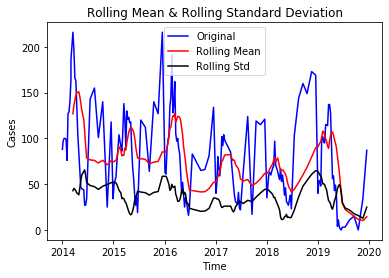

In [19]:
#Start by looking at Burkina Faso
burkina_faso = data.loc[data["Country"] == "Burkina Faso"]
burkina_faso = burkina_faso.drop(columns=["Country", "Deaths", "Summary"])
plt.ylabel("Cases")
plt.xlabel("Time")
plt.plot(burkina_faso, color = 'blue', label = 'Original')
rolling_mean = burkina_faso.rolling(window=12).mean()
rolling_std = burkina_faso.rolling(window=12).std()
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


We can see that the current data is not stationary (the mean and std is not constant throughout the time), so we will have to apply a transform to make the mean std and constant. We will start with the difference method (subtract each value from the previous timestep) and see whether that makes the data stationary.

In [52]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value[0])
    return pd.Series(diff)

X = burkina_faso.values
#difference data
stationary_data = difference(X)
stationary_data.index = burkina_faso.index[1:]
result = adfuller(stationary_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print(stationary_data)

ADF Statistic: -7.301967
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576
Date
2014-01-06     9
2014-01-13     3
2014-01-20     0
2014-01-27    -1
2014-02-03   -23
              ..
2019-08-15     8
2019-09-16     4
2019-10-16   -15
2019-11-18    34
2019-12-16    53
Length: 177, dtype: int64


Since the statistic is much smaller than the critical values, we can reject the null hypothesis with high confidence and assume that the data is now stationary.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


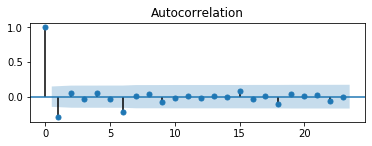

In [53]:
df_log = np.log(burkina_faso)
#Plotting a Autocorrelation function and Partial Autocorrelation Function to determine which previous timesteps 
# most significantly affect the current timestep
plt.figure()
plt.subplot(211)
plot_acf(stationary_data, ax=plt.gca())
plt.show()

The ACF plot shows that adjacent data points are in general very highly correlated. This means that a) using the most recent datapoints will allow the model to produce the best predictions and b) for the future, the model will be able to produce the best accuracy for a prediction no more than 5 weeks in the future. After that correlation between datapoints becomes almost insignificant

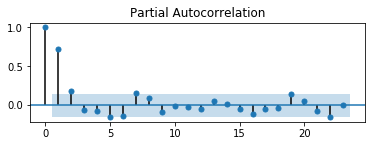

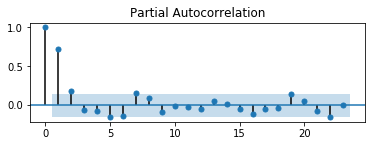

In [55]:
#Visualizing results of the Partial autocorrelation function (removes influence of future timesteps on current timesteps)
plt.subplot(211)
plot_pacf(burkina_faso, ax=plt.gca())

The PACF plot confirms some of the trends in the ACF plot in that adjacent datapoints are highly correlated. Recall that PACF measures the direct correlation between two points (between an observation and its lag) while ACF measures all of the direct and indirect correlations (e.g. t might be affected by t-1 but t-1 is also affected by t-2). However there also seem to be some correlation between datapoints that are five or six weeks apart. It seems like an Autoregressive model of third order would a good starting point for measuring its performance

Below, I will look at monthly correlation data to see if the noise added from differences in temporal time axes (i.e. weekly in beginning of year and monthly near the end) make a difference

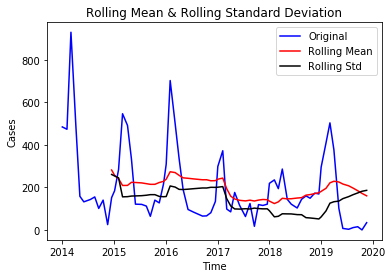

In [56]:
data_month = pd.read_csv("../Current_Data/Month_data.csv", usecols=['Country','Date','Cases','Deaths','Summary'], 
                  parse_dates=["Date"], index_col="Date",header = 0)
burkina_faso_month = data_month.loc[data_month["Country"] == 1]
burkina_faso_month = burkina_faso_month.drop(columns=["Country", "Deaths", "Summary"])
plt.ylabel("Cases")
plt.xlabel("Time")
plt.plot(burkina_faso_month, color = 'blue', label = 'Original')
rolling_mean = burkina_faso_month.rolling(window=12).mean()
rolling_std = burkina_faso_month.rolling(window=12).std()
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

X_month = burkina_faso_month.values
#difference data
stationary_data_month = difference(X_month)

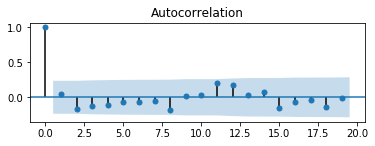

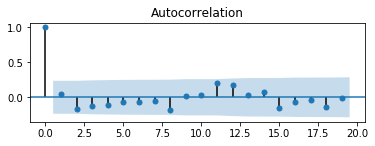

In [57]:
plt.figure()
plt.subplot(211)
plot_acf(stationary_data_month, ax=plt.gca())

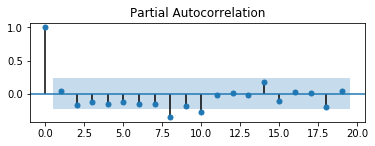

In [58]:
plt.subplot(212)
plot_pacf(stationary_data_month, ax=plt.gca())
plt.show()

There doesn't seem to be a large difference, so we will move forward and test the ARIMA model on the initial data. An ARIMA model takes 3 parameters 
1. p the number of autoregressive terms (the number of previous terms used to predict the current term) 
i.e. p = 1 would be $y_{t}$ = $B_{0}$ + $B_{1}$$x_{t-1}$
2. d the number of nonseasonal differences needed for stationarity (given that we only used the previous term
to ensure the data was stationary, this would be 1)
3. q the number of lagged forecast errors in the prediction equation
The q term is used for exponential smoothing i.e. sometimes, taking the most recent prediction may not be the best 
strategy and instead we want to take some kind of average over previous terms to **filter out noise**.

Now that we've made our data stationary, a potential starting point could be ARIMA (2,1,1)
